In [51]:
import requests
from bs4 import BeautifulSoup as bs         # package untuk web scrapping (beautifulsoup4)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [179]:
url0 = "https://www2.2019seagames.com/countries/"

data0 = requests.get(url0).content
data0 = bs(data0,'html.parser')

flatList0 = []
for i in data0.find_all('em'):
#     print(i.text)
    flatList.append(i.text)
    
flatList

BRUNEI DARUSALLAM
Total: 14
Gold: 0
Silver: 5
Bronze: 9
First Joined: 1977
CAMBODIA
Total: 17
Gold: 3
Silver: 2
Bronze: 12
First Joined: 1961
INDONESIA
Total: 191
Gold: 38
Silver: 63
Bronze: 90
First Joined: 1977
LAO PEOPLE’S DEMOCRATIC REPUBLIC
Total: 26
Gold: 2
Silver: 3
Bronze: 21
First Joined: 1959
MALAYSIA
Total: 323
Gold: 145
Silver: 92
Bronze: 86
First Joined: 1959
MYANMAR
Total: 37
Gold: 7
Silver: 10
Bronze: 20
First Joined: 1959
PHILIPPINES
Total: 121
Gold: 24
Silver: 33
Bronze: 64
First Joined: 1977
SINGAPORE
Total: 188
Gold: 57
Silver: 58
Bronze: 73
First Joined: 1959
THAILAND
Total: 246
Gold: 72
Silver: 86
Bronze: 88
First Joined: 1959
TIMOR LESTE
Total: 3
Gold: 0
Silver: 0
Bronze: 3
First Joined: 2003
VIETNAM
Total: 168
Gold: 58
Silver: 50
Bronze: 60
First Joined: 1959
BRUNEI DARUSALLAM
Total: 14
Gold: 0
Silver: 5
Bronze: 9
First Joined: 1977
CAMBODIA
Total: 17
Gold: 3
Silver: 2
Bronze: 12
First Joined: 1961
INDONESIA
Total: 191
Gold: 38
Silver: 63
Bronze: 90
First Joined:

In [43]:
url1 = "https://www2.2019seagames.com/medals/"

data1 = requests.get(url1).content
data1 = bs(data1,'html.parser')
iframe = data1.find_all('iframe')


url12 = iframe[0]['src']

In [175]:
url12

data12 = requests.get(url12).content
data12 = bs(data12,'html.parser')
data12

flatList =[]
for i in data12.find_all('small'):
    cek = str(i.text)
#     print(cek)
    flatList.append(cek)
# print(flatList)
flatList = np.array(flatList)
len(flatList)
flatList = flatList.reshape(12,-1)

header2019 = flatList[0]
flatList = flatList[1:]
listT = flatList.T
listT

label2019 = listT[0]
label2019
gold2019 = np.array(listT[1])
gold2019 = gold2019.astype('int')



In [176]:
# DATA 2019

df2019 = pd.DataFrame(
{
    'negara' : label2019,
    'gold' : gold2019
})
df2019 = df2019.sort_values('negara')
df2019

max2019 = df2019[df2019['gold'] == df2019['gold'].max()]
max2019.negara

0    PHILIPPINES
Name: negara, dtype: object

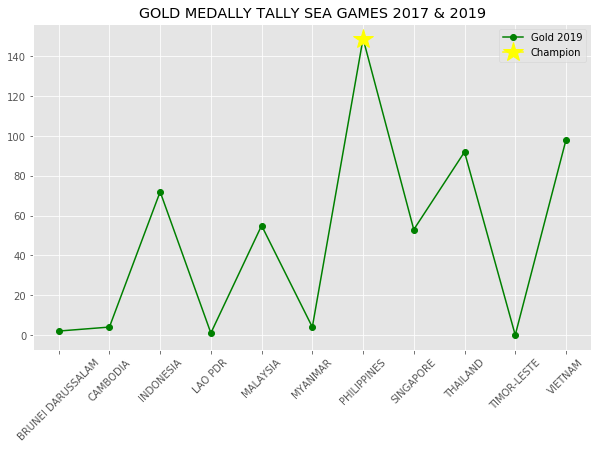

In [177]:
plt.style.use('ggplot')
%matplotlib inline
fig = plt.figure(figsize=(10,6))

plt.plot(df2019.negara, df2019.gold, color="g", marker='o', label="Gold 2019")
plt.plot(max2019.negara, max2019.gold, color="yellow", marker="*",markersize=20, label="Champion")

plt.title("GOLD MEDALLY TALLY SEA GAMES 2017 & 2019")
plt.legend()
plt.xticks(rotation='45')
plt.show()

Text(0.5, 0.9, 'GOLD % SEA GAMES 2019')

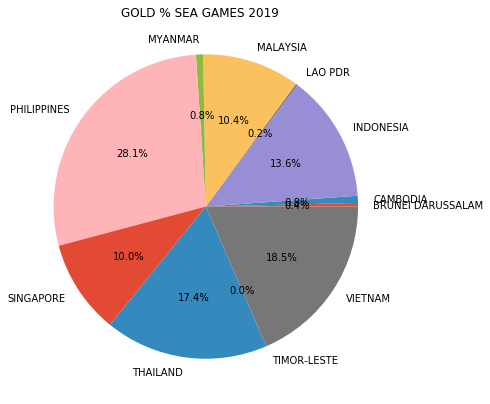

In [174]:
value = df2019.gold
label = df2019.negara


# plt.style.use("seaborn-pastel")
fig = plt.figure(figsize=(7,7))
ax1 = plt.pie(value, labels=label,
               autopct='%1.1f%%', 
#               colors=['#ffba92', '#c06c84', '#1fab89', '#b2dffb','#ffba92', '#c06c84', '#ff6f5e', '#ff8080', '#f0134d'],
               textprops = {'color':"k"}
             )

plt.suptitle("GOLD % SEA GAMES 2019", y=0.9)
